# Model Project

Import and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import modelproject

## Question 1

=== Question 1.1, epsilon = 1.0 ===
Optimizer: ell* = 8.2656, c* = 4.0328, U* = 0.8821, time = 0.335 ms
FOC/root:  ell* = 8.2656, c* = 4.0328, U* = 0.8821, time = 0.049 ms



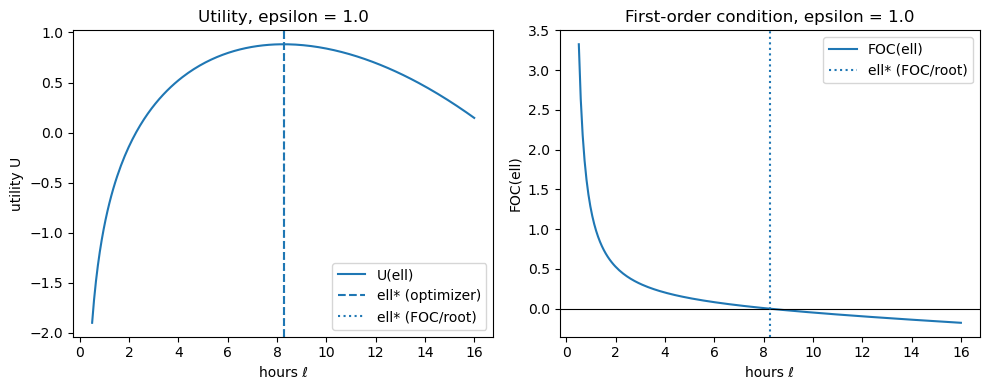

=== Question 1.1, epsilon = 0.75 ===
Optimizer: ell* = 11.1360, c* = 5.4680, U* = 1.1170, time = 0.117 ms
FOC/root:  ell* = 11.1360, c* = 5.4680, U* = 1.1170, time = 0.043 ms



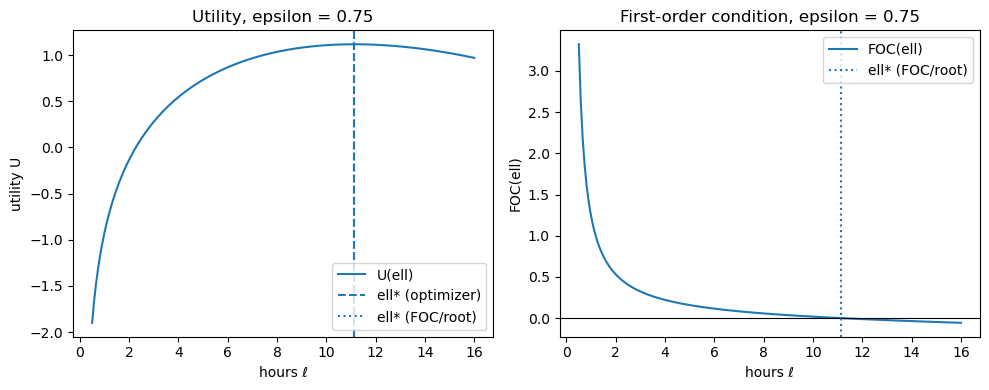

=== Question 1.1, epsilon = 0.5 ===
Optimizer: ell* = 16.0000, c* = 7.9000, U* = 1.4269, time = 0.236 ms
FOC/root:  ell* = 0.2000, c* = 0.0000, U* = -19.1147, time = 0.007 ms



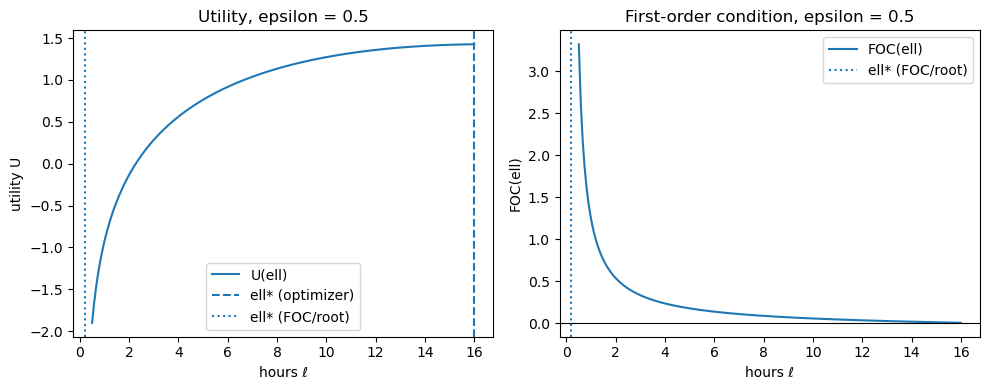

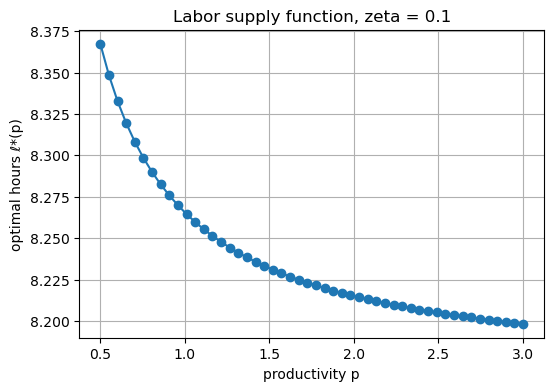

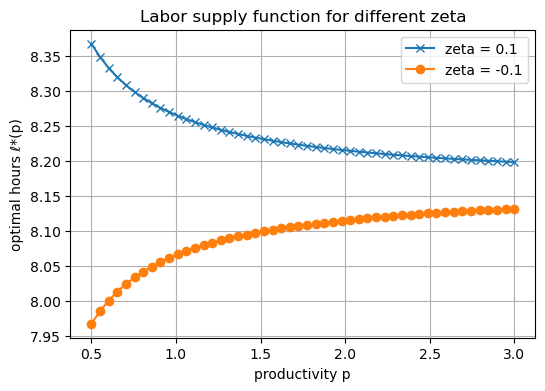

In [11]:
# ================================
# Setup for Question 1 (Worker)
# ================================

import numpy as np
import matplotlib.pyplot as plt
import time

from Worker import WorkerClass  # uses the WorkerClass from worker.py


# ============================================
# Question 1.1 – Optimizer vs FOC / root
# ============================================

def run_1_1_for_epsilon(epsilon):
    """
    Run all parts of Question 1.1 for a given epsilon:

    - Create a worker with given epsilon
    - Plot U(ell) for ell in [0.5, ell_max]
    - Plot FOC(ell) for ell in [0.5, ell_max]
    - Find optimal ell* with numerical optimizer
    - Find optimal ell* with FOC / root-finding
    - Compare solutions and runtimes
    - Show both plots in one combined figure
    """

    # 1) Set up worker with chosen epsilon (other parameters are baseline)
    worker = WorkerClass(par={'epsilon': epsilon})
    p = 1.0  # productivity p_i = 1 as in the assignment

    # 2) Grid of hours from 0.5 to ell_max
    ell_grid = np.linspace(0.5, worker.par.ell_max, 200)

    # 3) Compute utility U(ell) on the grid
    U_vals = np.array([worker.value_of_choice(p, ell) for ell in ell_grid])

    # 4) Compute first-order condition FOC(ell) on the grid
    FOC_vals = np.array([worker.FOC(p, ell) for ell in ell_grid])

    # 5) Solve for optimal ell* using numerical optimization
    t0 = time.perf_counter()
    opt_opt = worker.optimal_choice(p)
    t1 = time.perf_counter()

    # 6) Solve for optimal ell* using FOC / root-finding
    t2 = time.perf_counter()
    opt_foc = worker.optimal_choice_FOC(p)
    t3 = time.perf_counter()

    time_opt = t1 - t0
    time_foc = t3 - t2

    # 7) Print results and runtimes
    print(f"=== Question 1.1, epsilon = {epsilon} ===")
    print(
        f"Optimizer: ell* = {opt_opt.ell:.4f}, "
        f"c* = {opt_opt.c:.4f}, U* = {opt_opt.U:.4f}, "
        f"time = {time_opt*1e3:.3f} ms"
    )
    print(
        f"FOC/root:  ell* = {opt_foc.ell:.4f}, "
        f"c* = {opt_foc.c:.4f}, U* = {opt_foc.U:.4f}, "
        f"time = {time_foc*1e3:.3f} ms"
    )
    print()

    # 8) Combined figure with two panels: left = U, right = FOC
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Left panel: utility as a function of ell
    axes[0].plot(ell_grid, U_vals, label="U(ell)")
    axes[0].axvline(opt_opt.ell, linestyle="--", label="ell* (optimizer)")
    axes[0].axvline(opt_foc.ell, linestyle=":",  label="ell* (FOC/root)")
    axes[0].set_xlabel("hours ℓ")
    axes[0].set_ylabel("utility U")
    axes[0].set_title(f"Utility, epsilon = {epsilon}")
    axes[0].legend()

    # Right panel: FOC as a function of ell
    axes[1].plot(ell_grid, FOC_vals, label="FOC(ell)")
    axes[1].axhline(0.0, color="black", linewidth=0.8)
    axes[1].axvline(opt_foc.ell, linestyle=":", label="ell* (FOC/root)")
    axes[1].set_xlabel("hours ℓ")
    axes[1].set_ylabel("FOC(ell)")
    axes[1].set_title(f"First-order condition, epsilon = {epsilon}")
    axes[1].legend()

    plt.tight_layout()
    plt.show()


# ---- Run Question 1.1 for the three epsilons ----

run_1_1_for_epsilon(1.0)
run_1_1_for_epsilon(0.75)
run_1_1_for_epsilon(0.50)


# ============================================
# Question 1.2 – Labor supply function
# ============================================

def labor_supply(worker, p_grid, use_foc=True):
    """
    Compute optimal labor supply ell*(p) for each p in p_grid.

    If use_foc = True, we use the FOC / root method (optimal_choice_FOC).
    Otherwise, we use the numerical optimizer (optimal_choice).
    """

    ell_star = np.empty_like(p_grid)

    for i, p in enumerate(p_grid):
        if use_foc:
            opt = worker.optimal_choice_FOC(p)
        else:
            opt = worker.optimal_choice(p)
        ell_star[i] = opt.ell

    return ell_star


# ---- Set up productivity grid ----
p_grid = np.linspace(0.5, 3.0, 50)  # productivities from 0.5 to 3.0


# ---- Question 1.2, part 1: zeta = 0.1 (baseline) ----

# Worker with baseline tax: tau = 0.5, zeta = 0.1, epsilon = 1.0
worker_base = WorkerClass(par={'zeta': 0.1, 'epsilon': 1.0})

ell_star_base = labor_supply(worker_base, p_grid, use_foc=True)

plt.figure(figsize=(6, 4))
plt.plot(p_grid, ell_star_base, marker="o")
plt.xlabel("productivity p")
plt.ylabel("optimal hours ℓ*(p)")
plt.title("Labor supply function, zeta = 0.1")
plt.grid(True)
plt.show()


# ---- Question 1.2, part 2: zeta = -0.1 (lump-sum transfer) ----

# Worker with lump-sum transfer instead of tax: zeta = -0.1
worker_trans = WorkerClass(par={'zeta': -0.1, 'epsilon': 1.0})

ell_star_trans = labor_supply(worker_trans, p_grid, use_foc=True)

plt.figure(figsize=(6, 4))
plt.plot(p_grid, ell_star_base,  marker="x", label="zeta = 0.1")
plt.plot(p_grid, ell_star_trans, marker="o", label="zeta = -0.1")
plt.xlabel("productivity p")
plt.ylabel("optimal hours ℓ*(p)")
plt.title("Labor supply function for different zeta")
plt.legend()
plt.grid(True)
plt.show()
